In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import configparser
from alpha_vantage.timeseries import TimeSeries

In [15]:
# Get API key for Alpha_Vantage
config = configparser.ConfigParser()
config.read('../config.ini')

api_key = config['api_key']['alpha']

In [70]:
def get_close_price_df(stocks_dict, min_year_limit):  
    """Takes in dictionary of key=name, value=stock ticker
        and minimum year date. Returns DataFrame."""
    
    df = pd.DataFrame()

    for name, symbol in stocks_dict.items():
        ts = TimeSeries(key=api_key, output_format='pandas', indexing_type='date')
        data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
        df[name] = data['4. close']

    df.index = pd.to_datetime(df.index)
    
    df_result = df[df.index >= min_year_limit]
    
    return df_result

In [73]:
# Create data frame for stocks of interest with daily closing prices
stocks = {'Apple':'AAPL', 'Amazon':'AMZN', 'Alibaba':'BABA', 'Google':'GOOG', 'Netflix':'NFLX'}
df_stocks = get_close_price_df(stocks, '2016')

df_stocks.head()

,Apple,Amazon,Alibaba,Google,Netflix
date,,,,,
2016-01-04,105.35,636.99,76.69,741.84,109.96
2016-01-05,102.71,633.79,78.63,742.58,107.66
2016-01-06,100.70,632.65,77.33,743.62,117.68
2016-01-07,96.45,607.94,72.72,726.39,114.56
2016-01-08,96.96,607.05,70.80,714.47,111.39


In [74]:
# Create data frame for indexes with daily closing prices
indexes = {'Dow':'DJI', 'Nasdaq':'IXIC', 'S&P_500':'INX'}
df_indexes = get_close_price_df(indexes, '2016')

df_indexes.head()

,Dow,Nasdaq,S&P_500
date,,,
2016-01-04,17148.9395,4903.0898,2012.66
2016-01-05,17158.6602,4891.4302,2016.71
2016-01-06,16906.5098,4835.7598,1990.26
2016-01-07,16514.0996,4689.4302,1943.09
2016-01-08,16346.4502,4643.6299,1922.03


In [77]:
def plot_df(df, title):
    """Plots with input of dataframe and title."""
    df.plot()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price($)')
    plt.show()

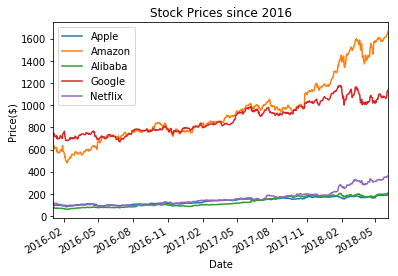

In [78]:
plot_df(df_stocks, 'Stock Prices since 2016')

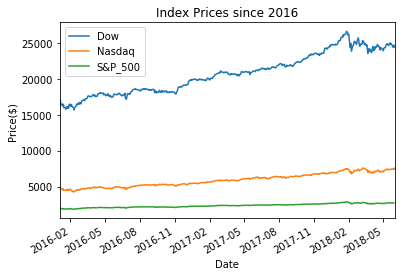

In [79]:
plot_df(df_indexes, 'Index Prices since 2016')

In [81]:
# Export dataframes to csv files
df_indexes.to_csv('data/StockPrices.csv', encoding='utf-8', index=False)
df_indexes.to_csv('data/IndexPrices.csv', encoding='utf-8', index=False)